<a href="https://colab.research.google.com/github/Reis25/AprendizadoDeMquinas/blob/master/testando_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJETO DE AM 2020.1 

Disciplina: Aprendizagem de Máquina  

Professores: Evandro Costa e Xu Yang 

Alunos: Demétrios Reis Costa, Flávio Oscar Hahn e Mauricésar Junior

Este trabalho tem como finalidade avaliar os algoritmos bem como as compara-los afim de termos uma análise precisa e detalhada. A base de dados selecionada pode ser encontrada em: 


```
https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease#
```








**Objetivo de Projeto:** Dado que os rins posssuem funções especiais na manutenção da nossa saúde, o dataset traz dados sobre valores de elementos que estão presentes em nossa constituição física assoim sendo o objetivo deste projeto é descobrir a correlação entre esses atributos de saúde e a doença renal crônica.
Desta forma, podemos permitir detecções precoces que facilitam as intervenções médicas e assim Identifiquemos os principais precursores da doença renal crônica usando as técnicas de aprendizado de máquina.

1ª Etapa-Análise: 
* 1. Realizar uma Análise Exploratória 
* 2. Investir em Pré-processamento  

2ª Etapa- Single: 
* 1. KNN 
* 2. Árvore de decisão 
* 3. SVM 
* 4. Rede Neural 
* 5. Naive Bayes 
* 6. Avaliar o desempenho de cada algoritmo (escolher a métrica) 

3ª Etapa- Incluir Redução de dimensionalidade: 
* 1. KNN 
* 2. Árvore de decisão 
* 3. SVM 
* 4. Rede Neural 
* 5. Naive Bayes 
* 6. Avaliar o desempenho de cada algoritmo (escolher a métrica) 

4ª Etapa- Aplicar balanceamento: 
* 1. KNN 
* 2. Árvore de decisão 
* 3. SVM 
* 4. Rede Neural 
* 5. Nave Bayes
* 6. Avaliar o desempenho de cada algoritmo (escolher a métrica) 
* 7. Realizar uma comparação entre os modelos classificadores. 

5ª Etapa- Ensemble boosting: 
* 1. Realizar combinação de três ou mais classificadores buscando um  desempenho melhor que a versão single dos classificadores 
* 2. Avaliar o desempenho de cada algoritmo (escolher a métrica) 
* 3. Realizar uma comparação entre os modelos classificadores.




In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

url1 = 'https://raw.githubusercontent.com/flaviohahn/ApMaquina/master/teste.csv'

data_frame = pd.read_csv(url1, error_bad_lines=False)

data_frame.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


  1ª Etapa: análise exploratória e pré-processamento de  dados:
* Verificação de instâncias com atributos nulos,
* Redução  de dimensionalidade (usar o PCA e  pelo menos mais uma técnica comparando-as)
* balanceamento de classes (justificar  a escolhar da técnica adotada)

In [75]:
data_frame = data_frame.replace({'?': None }) 
data_frame = data_frame.fillna(value=np.nan)
df3 = data_frame

In [76]:
data_frame.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data_frame.shape

(400, 25)

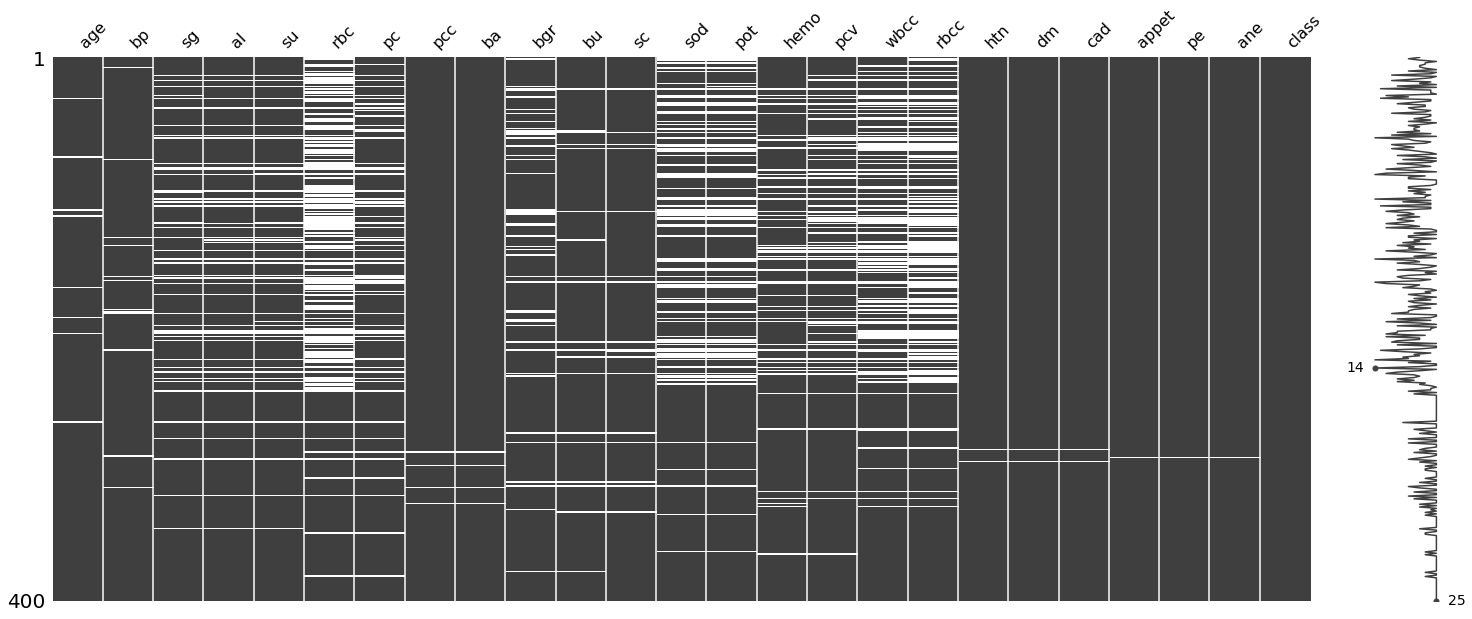

In [77]:
#Observando no dataset os dados faltantes 
import missingno as msno

msno.matrix(data_frame)
plt.show()

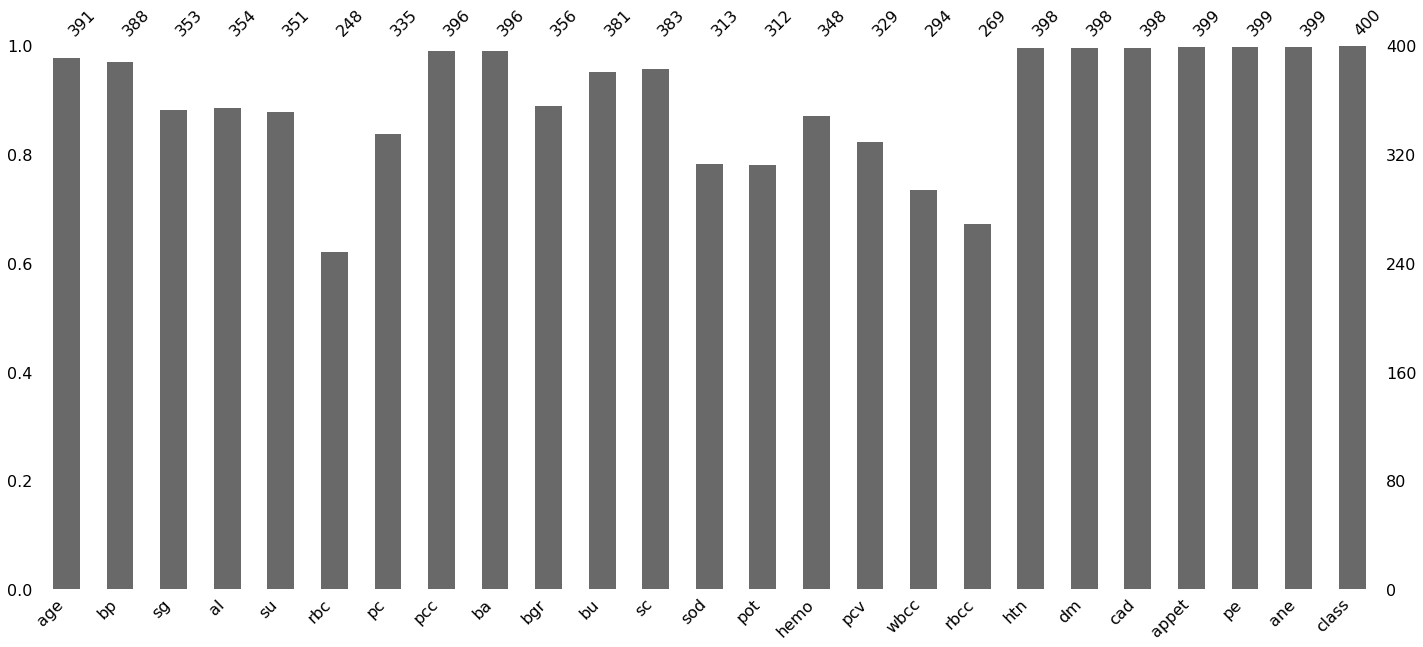

In [78]:
msno.bar(data_frame)
plt.show()

Como podemos observar essa base de dados voltada para à área da saúde onde suas classes representam um dado relativo a saúde do indivíduo. Assim temos:

   ID        | Classe  | Siginificado | Formato do dado
    :------: |:------ | -----------: |  ------: 
         1   |age      | idade                           | idade em anos
         2   |bp       | pressão arterial                | Blood Pressure(numerical) bp in mm/Hg
         3   |sg       | gravidade específica            | Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
         4   |al       | albumina                        | Albumin(nominal)al - (0,1,2,3,4,5)
         5   |su       | açúcar                          | Sugar(nominal) su - (0,1,2,3,4,5)
         6   |rbc      | glóbulos vermelhos              | Red Blood Cells(nominal) rbc - (normal,abnormal)
         7   |pc       | célula pus                      | Pus Cell (nominal) pc - (normal,abnormal)
         8   |pcc      | aglomerados de células de pus   | Pus Cell clumps(nominal) pcc - (present,notpresent)
         9   |ba       | bactéria                        | Bacteria(nominal) ba - (present,notpresent)
        10   |bgr      | glicose no sangue aleatória     | Blood Glucose Random(numerical) bgr in mgs/dl
        11   |bu       | uréia sanguínea                 | Blood Urea(numerical) bu in mgs/dl
        12   |sc       | creatinina sérica               | Serum Creatinine(numerical) sc in mgs/dl
        13   |grama    | sódio potássio                  | Sodium(numerical) sod in mEq/L
        14   |hemo     | hemoglobina                     | Potassium(numerical) pot in mEq/L
        15   |pcv      | volume de células compactadas   | Packed Cell Volume(numerical)
        16   |wc       | contagem de leucócitos          | White Blood Cell Count(numerical) wc in cells/cumm
        17   |rc       | contagem de glóbulos vermelhos  | Red Blood Cell Count(numerical) rc in millions/cmm
        18   |htn      | hipertensão                     | Hypertension(nominal) htn - (yes,no)
        19   |dm       | diabetes mellitus               | Diabetes Mellitus(nominal) dm - (yes,no)
        20   |cad      | doença arterial coronariana     | Coronary Artery Disease(nominal) cad - (yes,no)
        21   |apetite  | apetite                         | Appetite(nominal) appet - (good,poor)
        22   |pe       | edema pedal                     | Pedal Edema(nominal) pe - (yes,no)
        23   |ane      | anemia                          | Anemia(nominal)ane - (yes,no)
        24   |classe   | classe                          | Class (nominal) class - (ckd,notckd)


In [79]:
#aplicando a média ao age NaN
data_frame[['age']] = data_frame[['age']].apply(pd.to_numeric)
data_frame['age'] = data_frame['age'].fillna((data_frame['age'].mean()))

#aplicando a média ao bp NaN
data_frame[['bp']] = data_frame[['bp']].apply(pd.to_numeric)
data_frame['bp'] = data_frame['bp'].fillna((data_frame['bp'].mean()))

#aplicando a média ao sg NaN
data_frame[['sg']] = data_frame[['sg']].apply(pd.to_numeric)
data_frame['sg'] = data_frame['sg'].fillna((data_frame['sg'].mean()))

#aplicando a média ao al NaN
data_frame[['al']] = data_frame[['al']].apply(pd.to_numeric)
data_frame['al'] = data_frame['al'].fillna((data_frame['al'].mean()))

#aplicando a média ao su NaN
data_frame[['su']] = data_frame[['su']].apply(pd.to_numeric)
data_frame['su'] = data_frame['su'].fillna((data_frame['su'].mean()))

#aplicando a média ao rbcc columns NaN
data_frame[['rbcc']] = data_frame[['rbcc']].apply(pd.to_numeric)
data_frame['rbcc'] = data_frame['rbcc'].fillna((data_frame['rbcc'].mean()))

#aplicando a média ao sod columns NaN
data_frame[['sod']] = data_frame[['sod']].apply(pd.to_numeric)
data_frame['sod'] = data_frame['sod'].fillna((data_frame['sod'].mean()))

#aplicando a média ao pot columns NaN
data_frame[['pot']] = data_frame[['pot']].apply(pd.to_numeric)
data_frame['pot'] = data_frame['pot'].fillna((data_frame['pot'].mean()))

#aplicando a média ao bgr columns NaN
data_frame[['bgr']] = data_frame[['bgr']].apply(pd.to_numeric)
data_frame['bgr'] = data_frame['bgr'].fillna((data_frame['bgr'].mean()))

#aplicando normal ao rbc NaN
data_frame.rbc = data_frame.rbc.fillna('normal')

#aplicando normal ao pc NaN
data_frame.pc = data_frame.pc.fillna('normal')

In [80]:
data_frame.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36,1.2,137.528754,4.627244,15.4,44,7800,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,18,0.8,137.528754,4.627244,11.3,38,6000,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53,1.8,137.528754,4.627244,9.6,31,7500,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56,3.8,111.000000,2.500000,11.2,32,6700,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26,1.4,137.528754,4.627244,11.6,35,7300,4.600000,no,no,no,good,no,no,ckd


In [81]:
# renomeando class(palavra reservada) por classification 
data_frame.rename(columns={'class': 'classification'}, inplace=True)

In [82]:
data_frame.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36,1.2,137.528754,4.627244,15.4,44,7800,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,18,0.8,137.528754,4.627244,11.3,38,6000,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53,1.8,137.528754,4.627244,9.6,31,7500,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56,3.8,111.000000,2.500000,11.2,32,6700,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26,1.4,137.528754,4.627244,11.6,35,7300,4.600000,no,no,no,good,no,no,ckd


Neste estudo, 24 dados de registro de informações de 400 pessoas como idade, 
pressão arterial, densidade, diabetes foram usados ​​como atributos. Os registros clínicos foram examinados para determinar se a doença renal crônica estava presente ou não e forneceram uma alta taxa de precisão com métodos de aprendizado de máquina.

A doença renal crônica é uma doença que prejudica as funções normais dos rins e prejudica os rins. É uma das doenças mais comuns no mundo e a previsão da doença é uma das questões básicas no diagnóstico médico. A doença renal crônica é uma das principais causas de morte em todo o mundo. A detecção precoce desta doença é muito importante em termos de custos de saúde e tratamento. Muitos algoritmos de aprendizado de máquina têm sido usados ​​na literatura para prever a doença.

No estudo, seis classificadores diferentes foram utilizados para determinar a doença renal crônica alvo e o classificador de melhor desempenho foi tentado. Esses algoritmos foram comparados com base na precisão, sensibilidade, sensibilidade, recall e pontuação f1. Quando os resultados foram avaliados com os dados utilizados neste estudo, percebeu-se que o método da floresta aleatória (com precisão de 99,16%) apresentou desempenho melhor que outros algoritmos de classificação.

As ferramentas de aprendizado de máquina podem ser usadas para o diagnóstico preciso e oportuno de doença renal crônica, ajudando os médicos a confirmar seus achados diagnósticos em um tempo relativamente curto, ajudando assim um médico a procurar e diagnosticar mais pacientes em menos tempo. Em estudos futuros, pode ser possível usar diferentes algoritmos, como métodos de aprendizado profundo, para prever a doença renal crônica.


In [83]:
data_frame['rbc'] = data_frame.rbc.replace(['normal','abnormal'], ['1', '0'])
data_frame['pc'] = data_frame.pc.replace(['normal','abnormal'], ['1', '0'])
data_frame['pcc'] = data_frame.pcc.replace(['present','notpresent'], ['1', '0'])
data_frame['ba'] = data_frame.ba.replace(['present','notpresent'], ['1', '0'])
data_frame['htn'] = data_frame.htn.replace(['yes','no'], ['1', '0'])
data_frame['dm'] = data_frame.dm.replace(['yes','no'], ['1', '0'])
data_frame['cad'] = data_frame.cad.replace(['yes','no'], ['1', '0'])
data_frame['appet'] = data_frame.appet.replace(['good','poor'], ['1', '0'])
data_frame['pe'] = data_frame.pe.replace(['yes','no'], ['1', '0'])
data_frame['ane'] = data_frame.ane.replace(['yes','no'], ['1', '0'])
data_frame['classification'] = data_frame.classification.replace(['ckd','ckd\t','notckd'], ['1', '1','0'])
data_frame.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,36,1.2,137.528754,4.627244,15.4,44,7800,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,18,0.8,137.528754,4.627244,11.3,38,6000,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53,1.8,137.528754,4.627244,9.6,31,7500,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56,3.8,111.000000,2.500000,11.2,32,6700,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26,1.4,137.528754,4.627244,11.6,35,7300,4.600000,0,0,0,1,0,0,1


In [90]:
data_reduction = data_frame

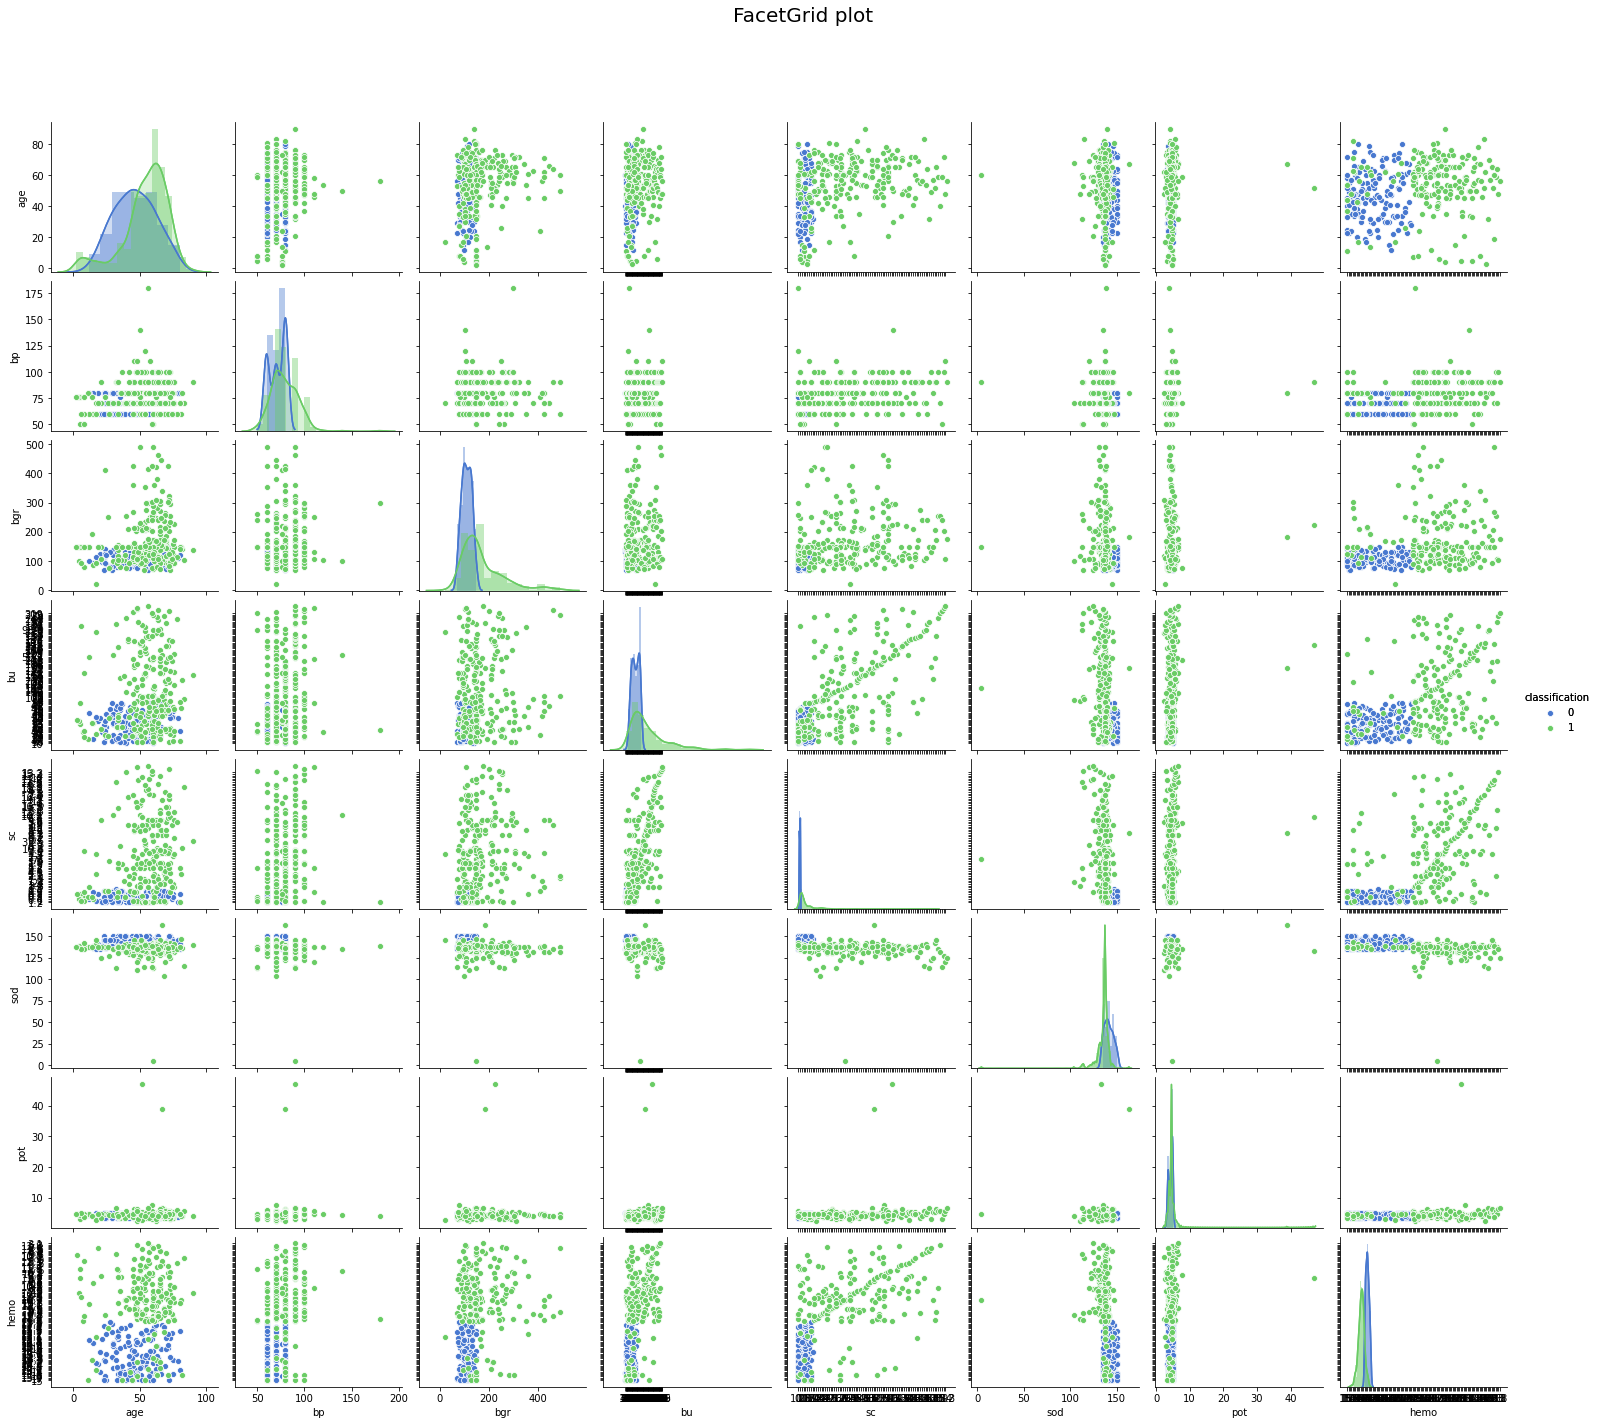

In [85]:
import seaborn as sns

g = sns.pairplot(data_frame, vars =['age', 'bp','bgr', 'bu', 'sc','sod', 'pot', 'hemo'],hue = 'classification')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

In [86]:
data_frame = data_frame.interpolate(method='pad')
data_frame.rbc = data_frame.rbc.interpolate(method='pad')
data_frame.pc = data_frame.pc.interpolate(method='pad')
data_frame['rbc'] = data_frame.rbc.replace(['normal','abnormal'], [1,0])
data_frame['pc'] = data_frame.pc.replace(['normal','abnormal'], [1,0])
data_frame['pcc'] = data_frame.pcc.replace(['present','notpresent'], [1,0])
data_frame['ba'] = data_frame.ba.replace(['present','notpresent'], [1,0])
data_frame['htn'] = data_frame.htn.replace(['yes','no'], [1,0])
data_frame['dm'] = data_frame.dm.replace(['yes','no'], [1,0])
data_frame['cad'] = data_frame.cad.replace(['yes','no'], [1,0])
data_frame['appet'] = data_frame.appet.replace(['good','poor'], [1,0])
data_frame['pe'] = data_frame.pe.replace(['yes','no'], [1,0])
data_frame['ane'] = data_frame.ane.replace(['yes','no'], [1,0])
data_frame['classification'] = data_frame.classification.replace(['ckd','ckd\t','notckd'], [1,1,0])
#data_frame['wbcc'] = data_frame.wbcc.replace(['6200.0','8400.0'], [6200,8400])
data_frame = data_frame.dropna(axis=0)
data_frame.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wbcc              0
rbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [87]:
data_frame.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,36,1.2,137.528754,4.627244,15.4,44,7800,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,18,0.8,137.528754,4.627244,11.3,38,6000,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53,1.8,137.528754,4.627244,9.6,31,7500,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56,3.8,111.000000,2.500000,11.2,32,6700,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26,1.4,137.528754,4.627244,11.6,35,7300,4.600000,0,0,0,1,0,0,1


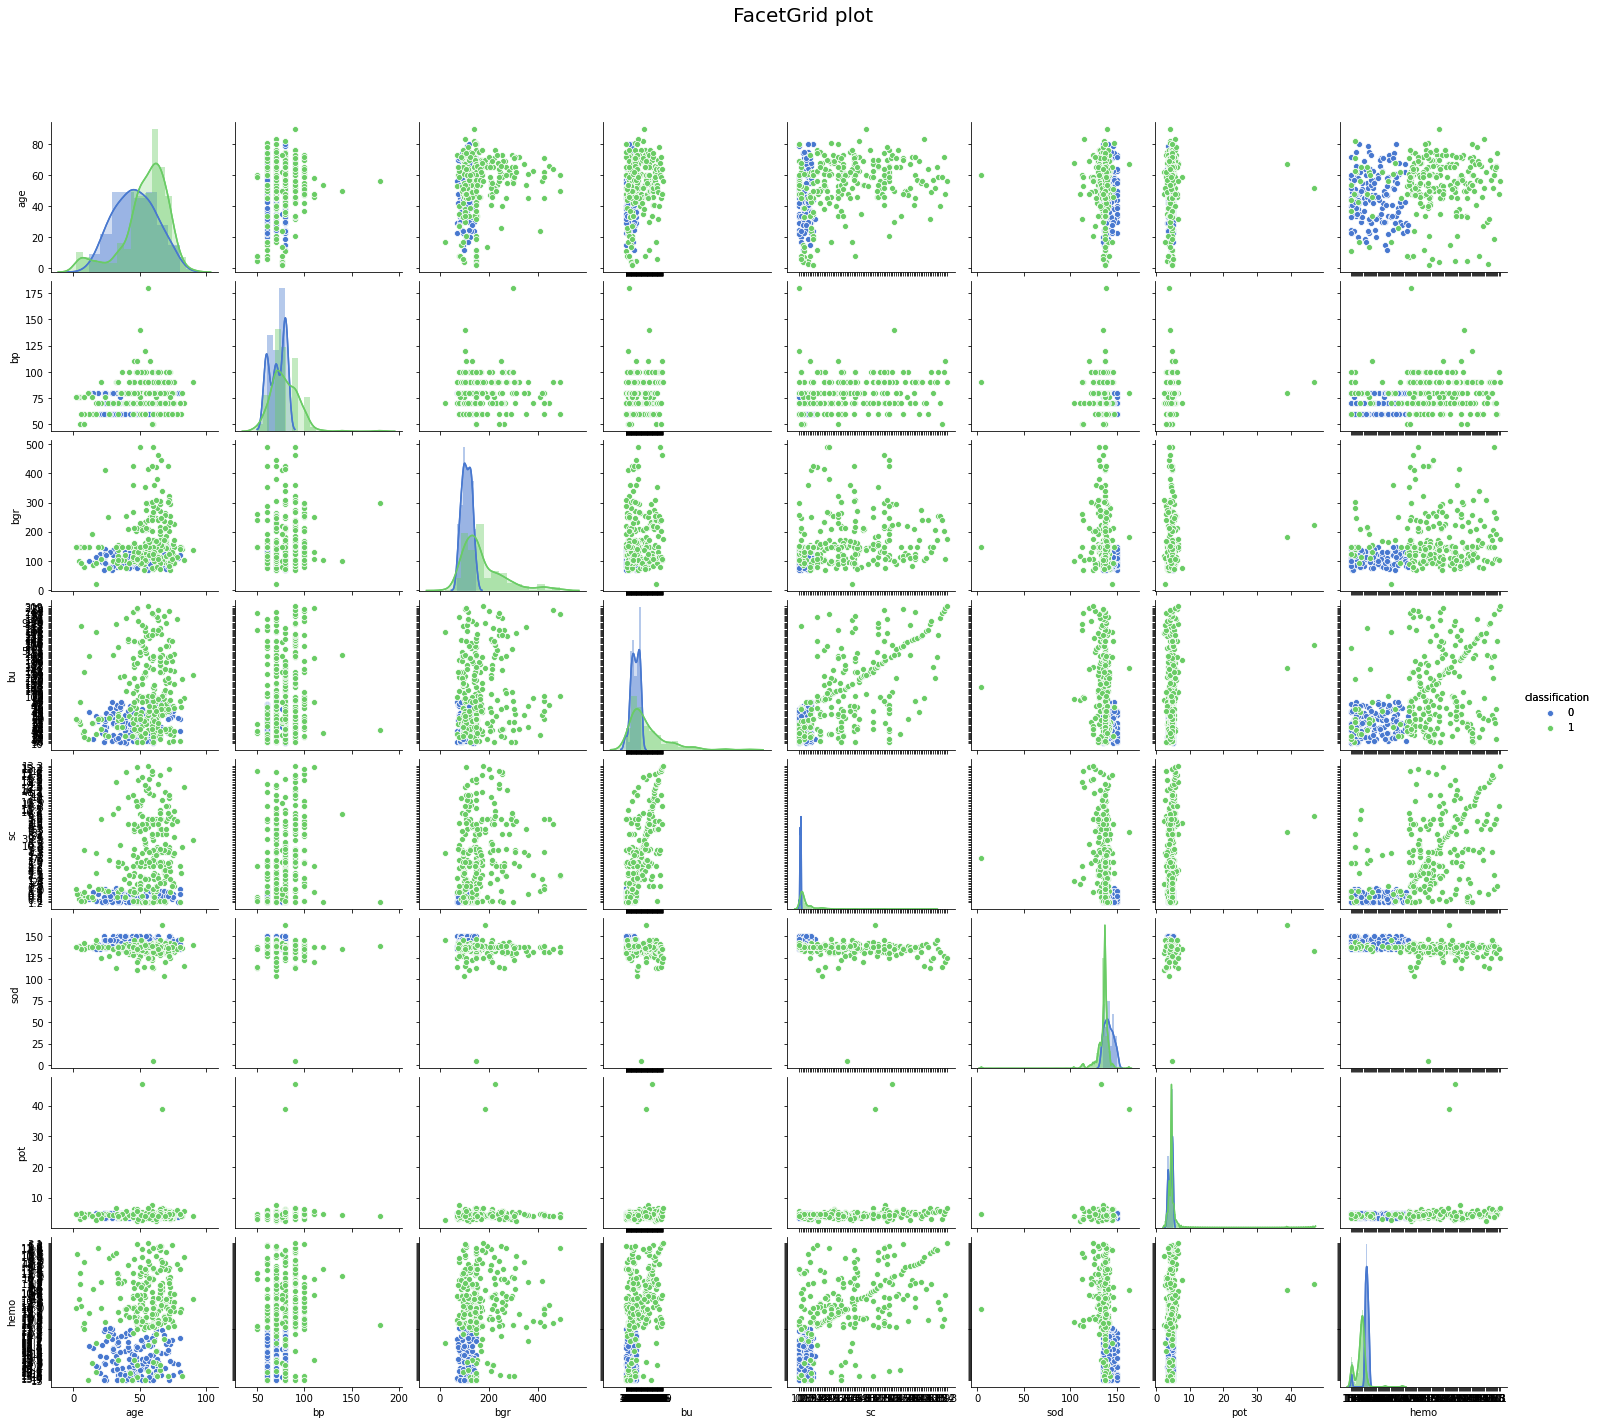

In [88]:
gg = sns.pairplot(data_frame, vars =['age', 'bp','bgr', 'bu', 'sc','sod', 'pot', 'hemo'],hue = 'classification')
gg.map_diag(sns.distplot)
gg.add_legend()
gg.fig.suptitle('FacetGrid plot', fontsize = 20)
gg.fig.subplots_adjust(top= 0.9);

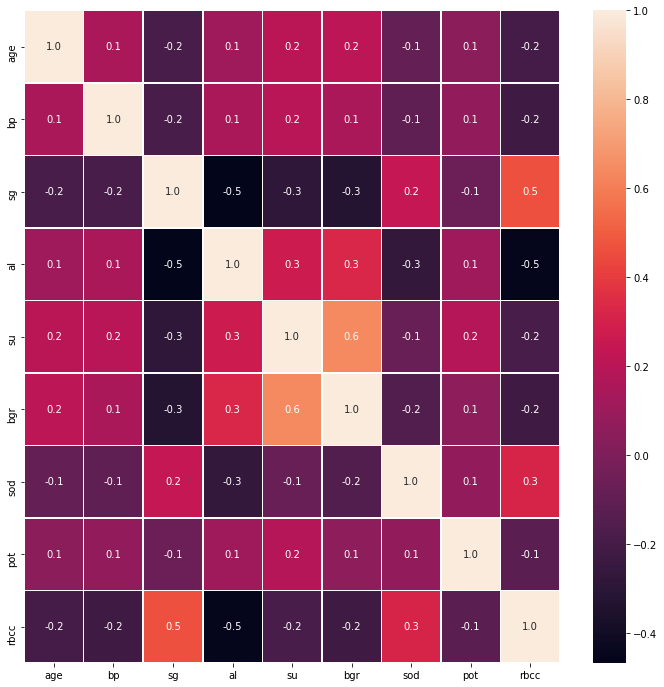

In [89]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data_frame.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

*   um valor absoluto de mais de 0,4 é considerado significativo.
Parece que há uma correlação negativa significativa entre rbc, pc e se o paciente tem doença renal crônica.
Mesmo assim, analisarei idade, glóbulos vermelhos, células de pus, glicemia aleatória, creatinina sérica, diabetes mellitus, doença arterial coronariana, uréia sangüínea, sódio, edema de pé e anemia

2ª Etapa- Single: 
* 1. KNN 
* 2. Árvore de decisão 
* 3. SVM 
* 4. Rede Neural 
* 5. Naive Bayes 
* 6. Avaliar o desempenho de cada algoritmo (escolher a métrica) 

In [17]:
#I used the knnimputer method for the remaining missing values
#because some features have specific values that's why I didn't get the mean value.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(data_frame)

df2 = pd.DataFrame(data = df_filled)

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.metrics import sensitivity_score
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from plotly.offline import init_notebook_mode, iplot

from collections import Counter
plt.style.use("seaborn-muted")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output



init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

from collections import Counter
plt.style.use("seaborn-muted")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [19]:
#these variables will be used to show the algorithm name and its successes.
from plotly.offline import init_notebook_mode
from plotly.offline import iplot


score=[] 
algorithms=[] 
precision=[]
sensitivity=[]
recall=[]
f1score=[]

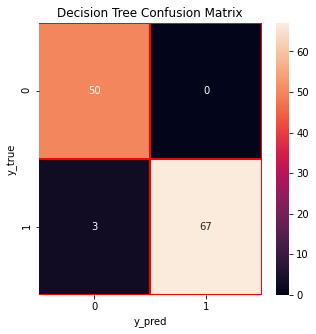

Decision Tree accuracy = 97.5
Decision Tree precision = 97.16981132075472
Decision Tree sensitivity = 97.85714285714286
Decision Tree recall = 97.85714285714286
Decision Tree f1 score = 97.81021897810218


In [20]:
from sklearn.tree import DecisionTreeClassifier

y = df2[24].values
x_data=df2.drop([24],axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

dt = DecisionTreeClassifier(criterion="entropy", max_depth = 5, random_state=1)
dt.fit(x_train,y_train)


#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=dt.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("Decision Tree accuracy =",dt.score(x_test,y_test)*100)
score.append(dt.score(x_test,y_test)*100)
algorithms.append("Decision Tree")

print("Decision Tree precision =",precision_score(y_true, y_pred, average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Decision Tree sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("Decision Tree recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Decision Tree f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)


In [21]:
print(algorithms)
print(score)

['Decision Tree']
[97.5]


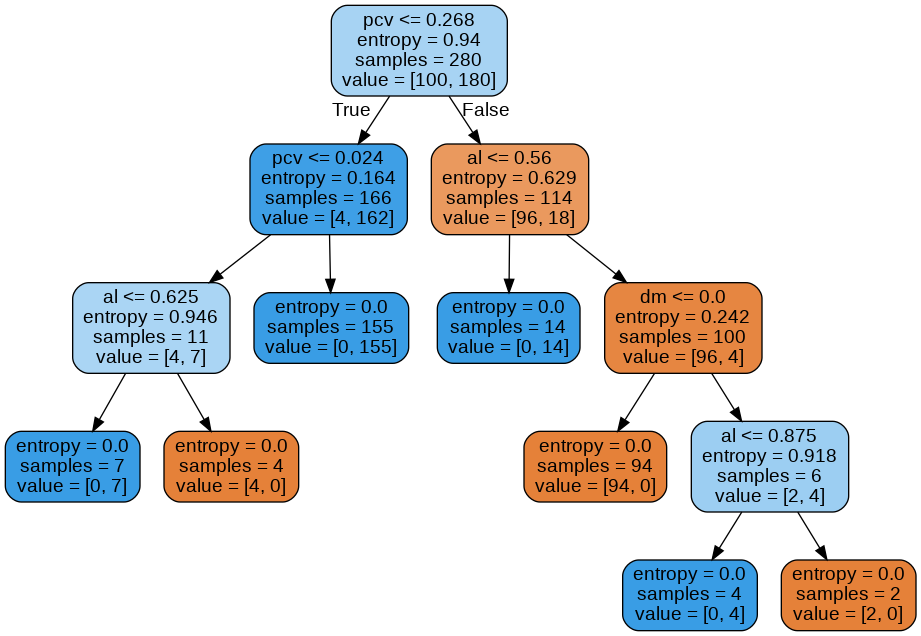

In [22]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin/'

features = list(data_frame.columns[1:])
features

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data,feature_names = features,filled = True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

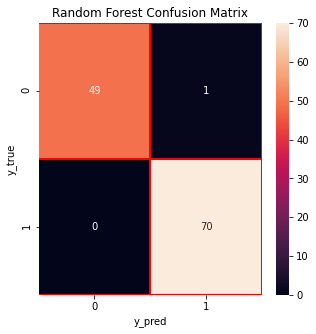

Random Forest accuracy = 99.16666666666667
Random Forest precision = 99.29577464788733
Random Forest sensitivity = 99.0
Random Forest recall = 99.0
Random Forest f1 score = 99.29078014184397


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train,y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()
print("Random Forest accuracy =",rf.score(x_test,y_test)*100)
score.append(rf.score(x_test,y_test)*100)
algorithms.append("Random Forest")

print("Random Forest precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Random Forest sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("Random Forest recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Random Forest f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

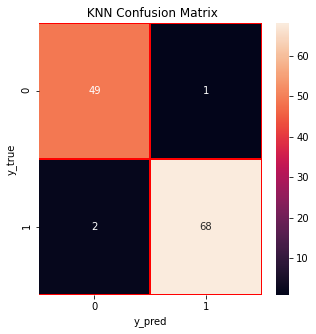

KNN accuracy = 97.5
KNN precision = 97.3145780051151
KNN sensitivity = 97.57142857142857
KNN recall = 97.57142857142857
KNN f1 score = 97.84172661870504


In [24]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

y=df2[24].values
x_data=df2.drop([24],axis=1)

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)


#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()

print("KNN accuracy =",knn.score(x_test,y_test)*100)
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")

print("KNN precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("KNN sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("KNN recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("KNN f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

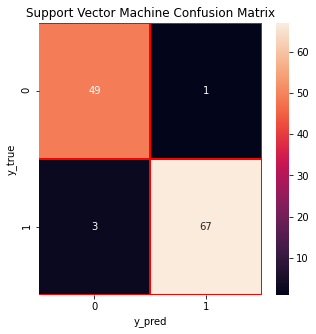

SVM accuracy = 96.66666666666667
SVM precision = 96.38009049773756
SVM sensitivity = 96.85714285714286
SVM recall = 96.85714285714286
SVM f1 score = 97.10144927536231


In [25]:
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=svm.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

print("SVM accuracy =",svm.score(x_test,y_test)*100)
score.append(svm.score(x_test,y_test)*100)
algorithms.append("Support Vector Machine")

print("SVM precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("SVM sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("SVM recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("SVM f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

#Confusion Matrix 
from sklearn.metrics import confusion_matrix
y_pred=nb.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

print("Naive Bayes accuracy =",nb.score(x_test,y_test)*100)
score.append(nb.score(x_test,y_test)*100)
algorithms.append("Naive Bayes")

print("Naive Bayes precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Naive Bayes sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("Naive Bayes recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Naive Bayes f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

In [27]:
print(algorithms)
print(score)
print(recall)

['Decision Tree', 'Random Forest', 'KNN', 'Support Vector Machine', 'Naive Bayes']
[97.5, 99.16666666666667, 97.5, 96.66666666666667, 94.16666666666667]
[97.85714285714286, 99.0, 97.57142857142857, 96.85714285714286, 94.71428571428571]


**Métricas:**

Servem para observar a efetividade do modelo, assim compara anotações reais com as predições. AS predições por sua vez devem ser similares as anotações reais. 

**Acurácia: **

Acurácia = (TP+TN)/(TP+FP+FN+TN)

**Precisão:** Calcula a taxa de casos Positivos (TP) classificados corretamente a partir das Predições Positivas (PP). Um baixo valor desta medida indica que dos casos POSITIVOS classificados, somente alguns deles estão corretos.

Precisão = TP/ ( TP+FP)

**Recall:** Calcula a taxa de casos Positivos (TP) classificados corretamente a partir dos casos Reais Positivos (RP), Um baixo valor desta medida indica que a predição falhou ao classificar alguns dos casos reais positivos.

 Recall =TP/(TP+FN)

**F-mensure (F\ score):** Representa a média harmônica entre o precision e recall, permitindo um balanço entre estas duas medidas. 

* Ambos precision e recall não avaliam, adequadamente, a efetividade nos casos negativos.

**Informedness [-1, 1]:** Represent a taxa de casos classificados corretamente baseado no número de casos reais positivos (RP) e negativos (RN)

**Markedness [-1, 1]:** Represent a taxa de casos (Positivos ou Negativos) classificados corretamente baseado no número de predições positivas (PP) e negativas (PN).Um baixo valor desta medida indica que, para cada instância classificada, o modelo de predição classifica muitas instâncias incorretamente.


In [28]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(x_train, y_train)


print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
#fpr,tpr,roc_auc = auc_scorer(clf, x_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_

Detailed classification report:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        50
         1.0       0.97      0.99      0.98        70

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

Confusion Matrix:
[[48  2]
 [ 1 69]]
Best parameters:
{'class_weight': 'balanced', 'max_depth': 3, 'n_estimators': 15, 'random_state': 42}


Text(0.5, 1.0, 'Feature Importance')

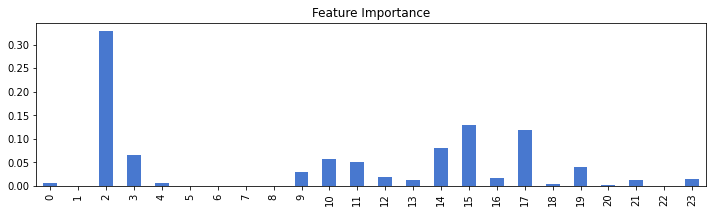

In [29]:
plt.figure(figsize=(12,3))
features = x_test.columns.values.tolist()
importance = clf_best.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

**Coonclusão:**

3ª Etapa- Incluir Redução de dimensionalidade: 
1. KNN 
2. Árvore de decisão 
3. SVM 
4. Rede Neural 
5. Naive Bayes 
6. Avaliar o desempenho de cada algoritmo (escolher a 


** Redução de dimensionalidade:** 

*   Em modelos preditivos, muitos atributos podem confundir o classificador (ou 
regressor), nisso tem-se a necessidade de fazermos uma redução de dimensionalidade afim de evitarmos inclusive a ‘maldição da dimensionalidade”  porque torna a distância entre pontos inúltil. 

*   Técnicas como remoção de atributos é bastante eficaz, podemos remover um de 2 atributos que são altamente relacionados entre si, nesse caso se o atrbuto for númerico calcula-se a correlação deles e se for categórico checar a se a informação é mútua. 

*   Pode-se remover atributos que tem uma distribuição de dados (muito) desbalanceado, que tenha muitos dados de um tipo e pouco dados de outro.
Pode-se remover atributos com pequena variância (em relação a atributos similares) 
Quando não devemos usar a redução de dimensionalidade? - Em modelos exploratórios. 

*   Principal Component Analisys - PCA:  É um método estatístico lineaar que encontra os autovalores e autovetores da matriz de covariância dos dados e, com esse resultado, pode-se realizar a redução dimensional dos dados e analisar os padrões principais de variabilidade presentes. 

*   O PCA se caracteriza de tratar a redução do espaço necessário para a representação da imagem, já que a PCA promove uma compactação de energia. 
Com o emprego do PCA temos uma análise mais rápida, produtiva, objetiva e eficiente. 

*   De acordo com Matt Brems, reuni o seguinte:
      * Se escolhermos remover as linhas que compõem o valor , teremos maior probabilidade de obter resultados *bem comportados,* geralmente o padrão do software. No entanto, perdemos alguma precisão em nossos dados coletados.
Se escolhermos não descartar nenhuma observação e substituí-los pelo que está disponível nos dados, não encontraremos resultados bem-comportados (matrizes de covariância inválidas), mas utilizamos todos os dados conforme pretendido.
Bem, decidi remover as linhas associadas aos valores VAZIOS no primeiro momento e em seguida aplicação do PCA.

*    O próprio autor do dataset encoraja para que façamos a supressão das linhas com dados restantes

In [30]:
# Excluindo dados que tem informações faltantes:
df3 = df3.dropna().reset_index(drop=True)

In [31]:
df3.shape

(269, 25)

In [32]:
#checando se há valores NaN
df3.isna().values.any()

False

In [33]:
#prepare variables for feature selection
y = df3['classification']
X = df3.loc[:, df3.columns != 'classification']

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [34]:
# Split-out validation dataset
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=3, test_size=0.20, random_state=7)
sss.get_n_splits(X, y)

#print(sss)       

for train_index, test_index in sss.split(X, y):
     #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



In [35]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [36]:
# Spot Check Algorithms
from sklearn import model_selection

models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    skfold = model_selection.StratifiedShuffleSplit(n_splits=3, test_size=0.20, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=skfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.589147 (0.029005)
CART: 1.000000 (0.000000)
NB: 0.984496 (0.021926)
SVM: 0.534884 (0.018988)


In [37]:
# Make predictions on validation dataset
for model in models:
    nb = model[1]
    nb.fit(X_train, y_train)
    predictions = nb.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    
    #
    print("--------------------------------------------------")
    print(model[0])
    print(accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print(tn, fp, fn, tp)
    print(classification_report(y_test, predictions))
    #print(predictions)

--------------------------------------------------
KNN
0.7777777777777778
[[25  1]
 [11 17]]
25 1 11 17
              precision    recall  f1-score   support

           0       0.69      0.96      0.81        26
           1       0.94      0.61      0.74        28

    accuracy                           0.78        54
   macro avg       0.82      0.78      0.77        54
weighted avg       0.82      0.78      0.77        54

--------------------------------------------------
CART
0.9814814814814815
[[26  0]
 [ 1 27]]
26 0 1 27
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.96      0.98        28

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

--------------------------------------------------
NB
0.9814814814814815
[[26  0]
 [ 1 27]]
26 0 1 27
              precision    recall  f

PCA, ou principal component analysis é uma técnica para reduzir a dimensão de um conjunto de dados preservando, de certa forma, suas propriedades

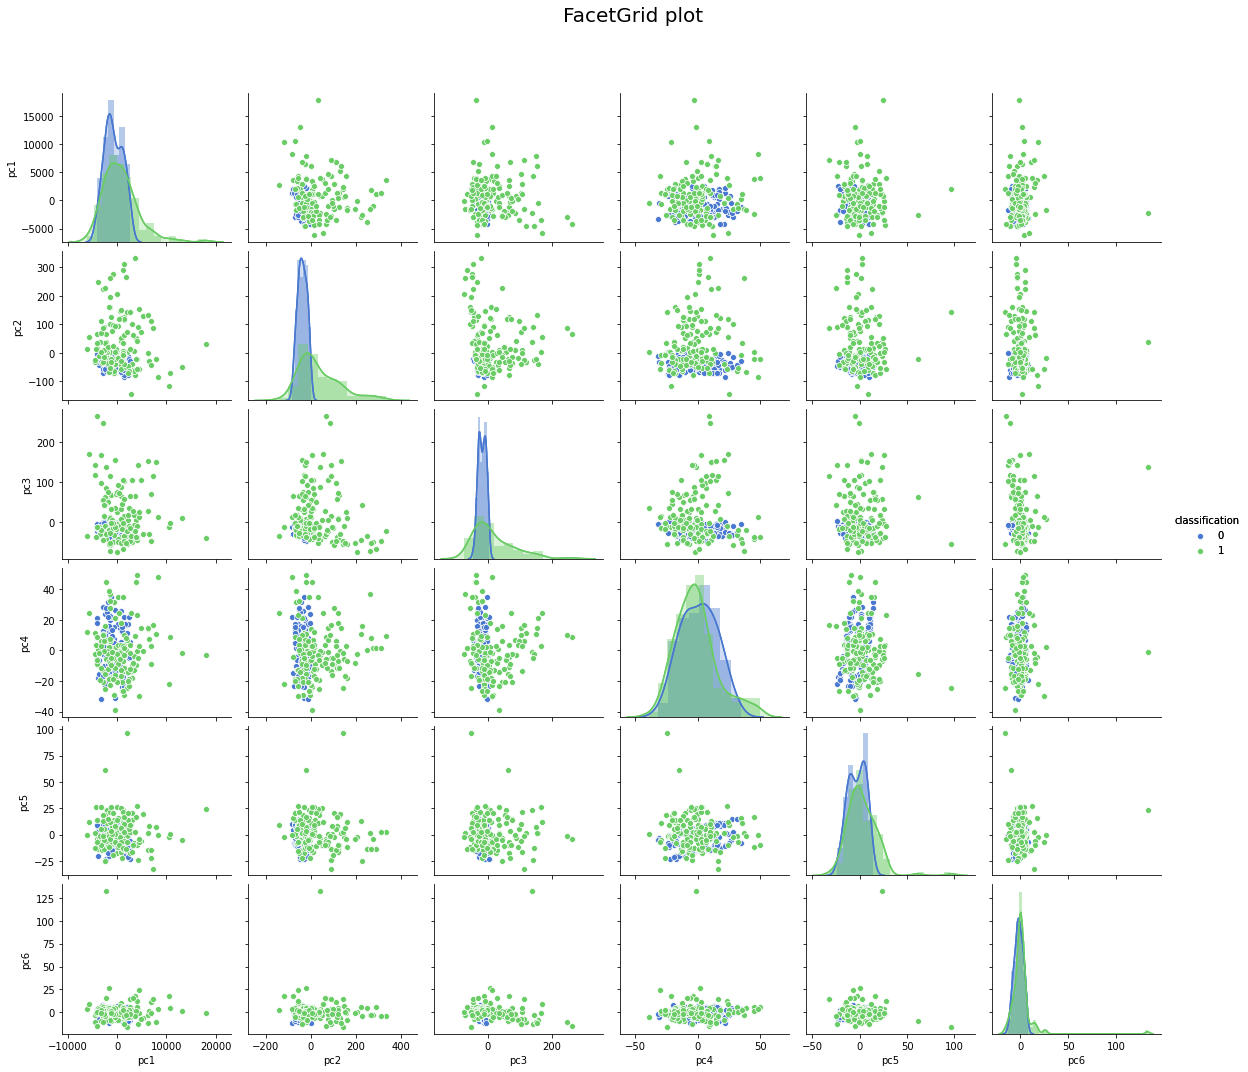

In [38]:
from sklearn.decomposition import  PCA

pca = PCA(n_components = 6)
pca.fit(X)
X = pca.transform(X)

novo_df = pd.DataFrame(X, columns =['pc1','pc2','pc3','pc4','pc5','pc6' ])
novo_df['classification'] = df3['classification']

HH = sns.pairplot(novo_df, vars= ['pc1','pc2','pc3','pc4','pc5','pc6' ], hue='classification')
HH.map_diag(sns.distplot)
HH.add_legend()
HH.fig.suptitle('FacetGrid plot', fontsize = 20)
HH.fig.subplots_adjust(top= 0.9);
plt.show()

4ª Etapa- Aplicar balanceamento: 
1. KNN 
2. Árvore de decisão 
3. SVM 
4. Rede Neural 
5. Nave Bayes
6. Avaliar o desempenho de cada algoritmo (escolher a métrica) 
7. Realizar uma comparação entre os modelos classificadores. 


Undersampling – Consiste em reduzir de forma aleatória os exemplos da classe majoritária.

Oversampling – Consiste em replicar dados aleatórios da classe minoritária. Como estamos duplicando os dados já existentes este método está propício a dar overfitting.

Classification 0: 250
Classification 1: 150
Proportion: 1.67 : 1


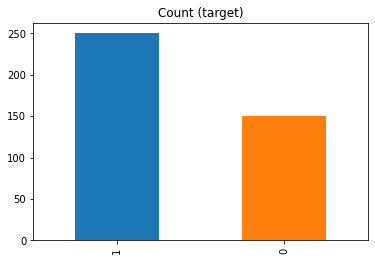

In [125]:
#IDENTIFICAR DESBALANCEAMENTO DOS DADOS
target_count = data_reduction.classification.value_counts()
print('Classification 0:', target_count[0])
print('Classification 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);

Note que temos 37,5% pertencente a classe 0 e 62,5% pertencente a classe 1, constatamos que temos uma classe desbalanceada, daí faremos esse tratamento. 

In [126]:
y=df2[24].values
x_data=df2.drop([24],axis=1)

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

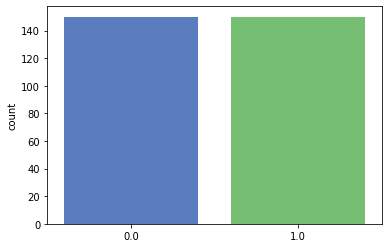

In [128]:
from imblearn.under_sampling import NearMiss

nr = NearMiss()

x, y = nr.fit_sample(x, y)

sns.countplot(x= y)

In [133]:
# Classificadores NA BASE UNDER SAMPLING
from xgboost import XGBClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# model knn
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)

# model SVM
svm = SVC(random_state=1)
svm.fit(x_train,y_train)

# model NB
nb = GaussianNB()
nb.fit(x_train,y_train)

# model XCGB
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy para XGBC: %.2f%%" % (accuracy * 100.0))
print("SVM accuracy =",svm.score(x_test,y_test)*100)
print("Naive Bayes accuracy =",nb.score(x_test,y_test)*100)
print("Random Forest accuracy =",rf.score(x_test,y_test)*100)

Accuracy para XGBC: 100.00%
SVM accuracy = 98.33333333333333
Naive Bayes accuracy = 93.33333333333333
Random Forest accuracy = 100.0


5ª Etapa- Ensemble boosting: 
1. Realizar combinação de três ou mais classificadores buscando um  desempenho melhor que a versão single dos classificadores 
2. Avaliar o desempenho de cada algoritmo (escolher a métrica) 
3. Realizar uma comparação entre os modelos classificadores.


In [134]:
import requests
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import bagging

In [135]:
#Classificador Single - Naive Bayes - Utilização da métrica de Acurácia para determinar sucesso do classificador

naive_clf = GaussianNB()
score = cross_val_score(naive_clf, X, Y, cv = 5)

print("Cross Validation mean: {}".format(np.mean(score)))

NameError: ignored

In [136]:
#Classificador Single - Suport Vector Machine - Utilização da métrica de Acurácia para determinar sucesso do classificador

svm_clf = svm.SVC(kernel = 'poly')
score = cross_val_score(svm_clf, X, Y, cv = 5)

print("Cross validation mean: {}".format(np.mean(score)))

svm_clf.fit(X_train, Y_train)
confusion = confusion_matrix(y_true = Y_test, y_pred = svm_clf.predict(X_test))
print('Confusion matrix:')
print(confusion)

NameError: ignored

In [137]:
#Classificador Single - Rede Neural Simples - Utilização da métrica de Acurácia para determinar sucesso do classificador

NNclf = MLPClassifier(solver='sgd', hidden_layer_sizes=(3,), learning_rate_init=0.1, activation='logistic', max_iter=1500, random_state=1)

score = cross_val_score(NNclf, X, Y, cv = 5)
print("Cross Validation mean: {}".format(np.mean(score)))

NameError: ignored

In [ ]:
#Classificador Single - K-Nnearest Neighbor - Utilização da métrica de Acurácia para determinar sucesso do classificador

knn_clf = KNeighborsClassifier(n_neighbors = 5)
score = cross_val_score(knn_clf, X, Y, cv = 5)

print("CV: {}".format(np.mean(score)))